# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/UAS BENGKOD/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# EDA

## Eksplorasi Awal

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Missing Value

In [7]:
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0] # Hanya ambil yang ada missing

print("\n=== Persentase Missing Value ===")
if len(missing_percentage) > 0:
    print(missing_percentage)
    # Visualisasi Missing Value (Diagram Batang)
    plt.figure(figsize=(10, 6))
    missing_percentage.plot(kind='bar', color='salmon')
    plt.title('Persentase Missing Value per Kolom')
    plt.ylabel('Persentase (%)')
    plt.show()
else:
    print("Tidak ada missing value yang terdeteksi secara langsung (NaN).")


=== Persentase Missing Value ===
Tidak ada missing value yang terdeteksi secara langsung (NaN).


## Distribusi Target

/tmp/ipython-input-1087552715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


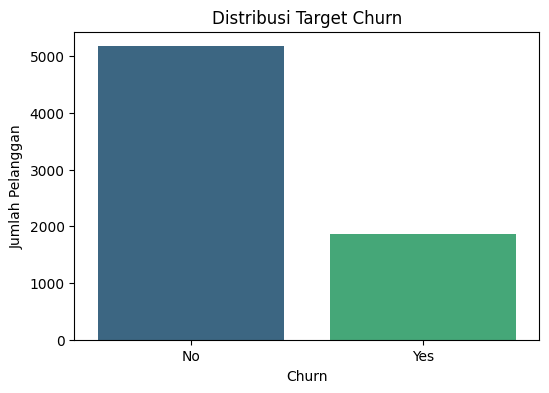

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Target Churn')
plt.xlabel('Churn')
plt.ylabel('Jumlah Pelanggan')
plt.show()

## Analisis Korelasi

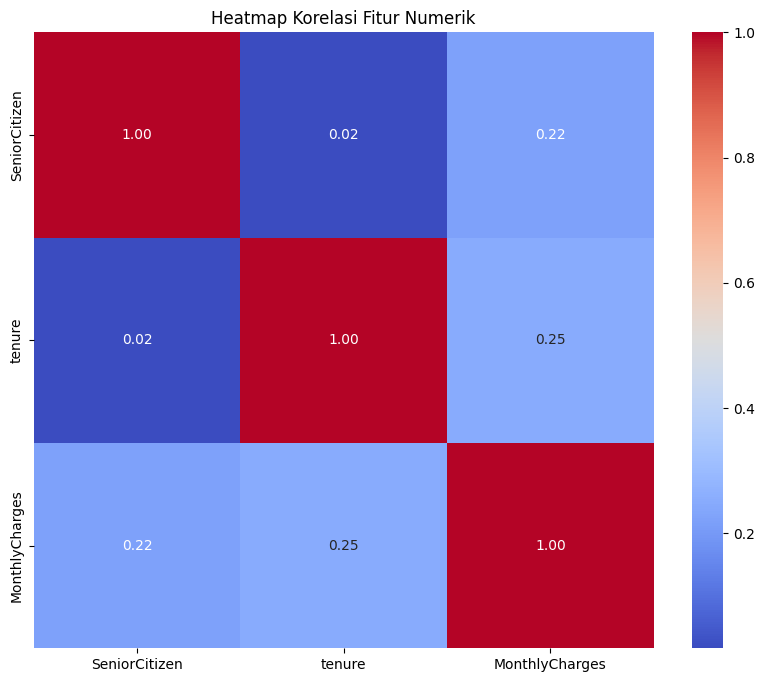

In [9]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# Direct Modeling

In [10]:
X = df.select_dtypes(include=['number'])
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

## train–test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah Data Training: {X_train.shape[0]}")
print(f"Jumlah Data Testing: {X_test.shape[0]}")

Jumlah Data Training: 5634
Jumlah Data Testing: 1409


## Definisi Model

In [12]:
# A. Model Konvensional: Logistic Regression
logreg = LogisticRegression(random_state=42)

# B. Model Ensemble Bagging: Random Forest
rf = RandomForestClassifier(random_state=42)

# C. Model Ensemble Voting: LogReg + KNN + SVM
clf1 = LogisticRegression(random_state=42)
clf2 = KNeighborsClassifier()
clf3 = SVC(probability=True, random_state=42) # SVM

voting_clf = VotingClassifier(estimators=[
    ('lr', clf1), ('knn', clf2), ('svm', clf3)], voting='hard')

In [13]:
# List model untuk loop evaluasi
models = {
    "Logistic Regression (Conventional)": logreg,
    "Random Forest (Bagging)": rf,
    "Voting Classifier (Voting)": voting_clf
}

## Training dan Evaluasi


==================== Logistic Regression (Conventional) ====================
Accuracy: 0.8055

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.69      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409



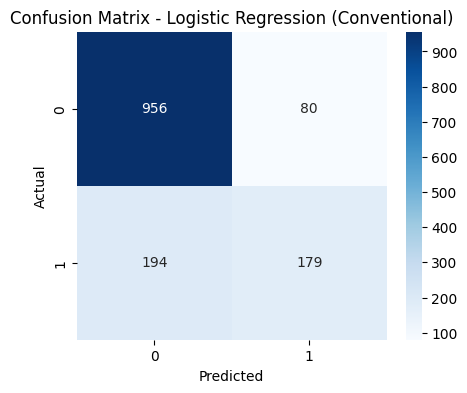


==================== Random Forest (Bagging) ====================
Accuracy: 0.7466

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1036
           1       0.52      0.47      0.50       373

    accuracy                           0.75      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.75      0.74      1409



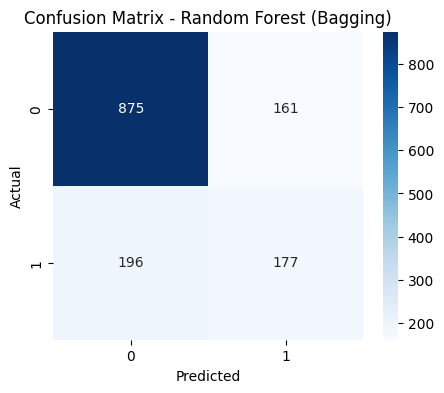


==================== Voting Classifier (Voting) ====================
Accuracy: 0.8034

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.70      0.45      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



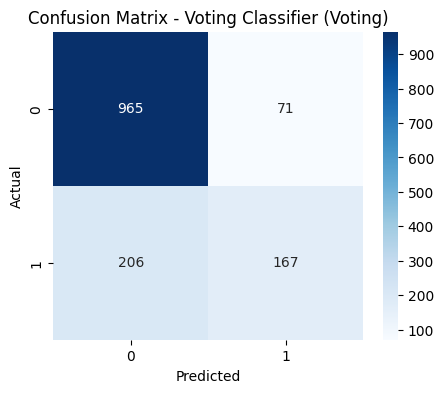

In [14]:
for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")

    # Training (Fit)
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi Metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Modeling dengan Preprocessing Data

## Preprocessing Data

In [15]:
df_clean = pd.read_csv('/content/drive/MyDrive/UAS BENGKOD/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f"Data awal dimuat: {df_clean.shape[0]} baris.")

Data awal dimuat: 7043 baris.


### Data Cleaning

In [16]:
if 'customerID' in df_clean.columns:
    df_clean.drop('customerID', axis=1, inplace=True)

df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
df_clean['TotalCharges'].fillna(df_clean['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-198164294.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['TotalCharges'].fillna(df_clean['TotalCharges'].median(), inplace=True)


### Data Duplikasi

In [17]:
duplikat = df_clean.duplicated().sum()
if duplikat > 0:
    df_clean.drop_duplicates(inplace=True)
    print(f"✅ {duplikat} data duplikat telah dihapus.")
else:
    print("✅ Tidak ditemukan data duplikat.")

✅ 22 data duplikat telah dihapus.


### Outlier

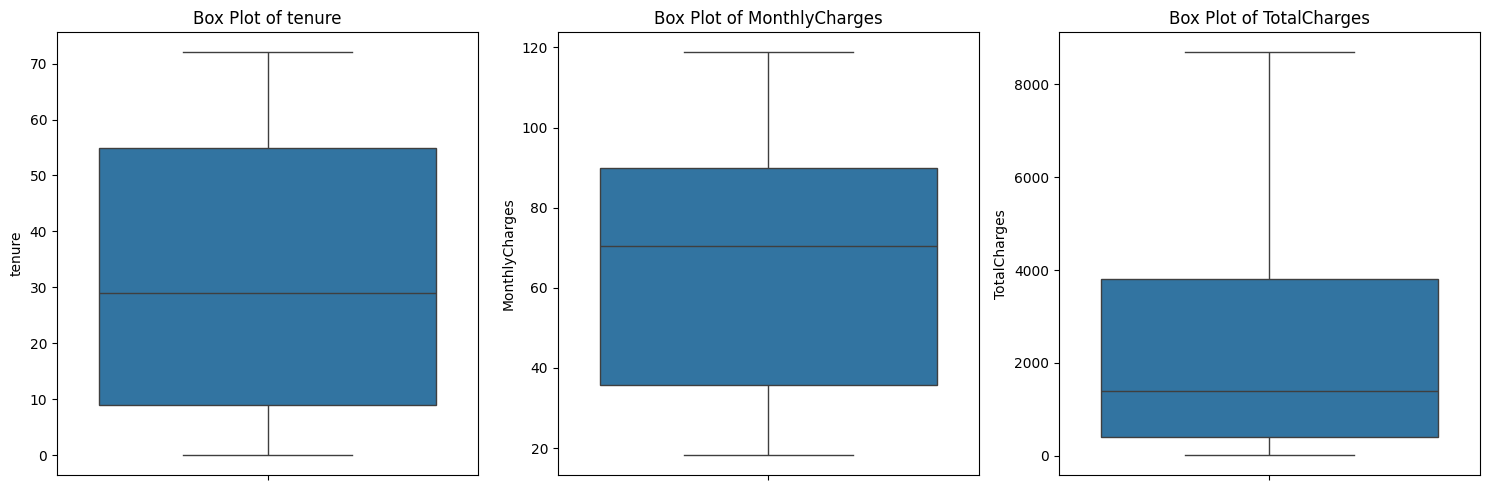

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik untuk visualisasi outlier
cols_numeric_to_check = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_numeric_to_check):
    plt.subplot(1, len(cols_numeric_to_check), i + 1)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Label Encoding

In [19]:
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

### One-Hot Encoding

In [20]:
df_clean = pd.get_dummies(df_clean, drop_first=True)

In [21]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

model_columns = list(X.columns)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Penanganan IMBALANCE (SMOTE)


--- Penanganan Imbalance (SMOTE) ---
Jumlah Churn (1) di Training set sebelum SMOTE: 1505
Jumlah Churn (1) di Training set setelah SMOTE: 4111
Data Training sekarang sudah seimbang.


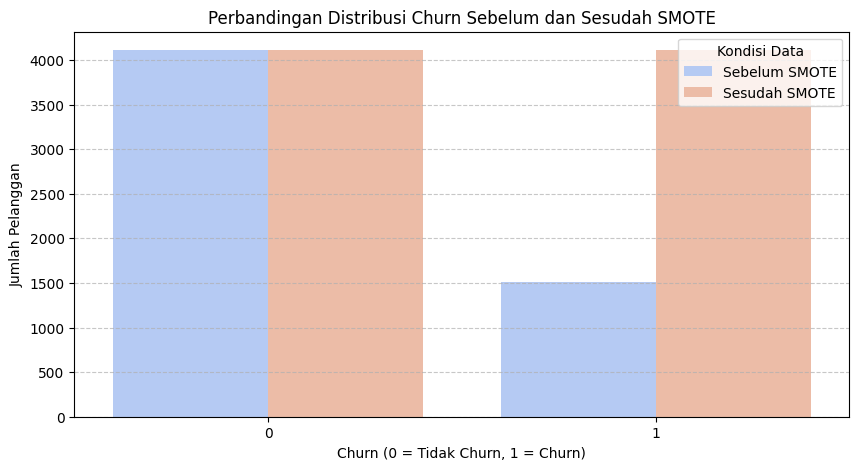

In [22]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Penanganan IMBALANCE (SMOTE)
# HANYA pada data training agar pengujian (test) tetap jujur
print("\n--- Penanganan Imbalance (SMOTE) ---")
print(f"Jumlah Churn (1) di Training set sebelum SMOTE: {sum(y_train==1)}")

smote = SMOTE(random_state=42)
X_train_final, y_train_final = smote.fit_resample(X_train, y_train)

print(f"Jumlah Churn (1) di Training set setelah SMOTE: {sum(y_train_final==1)}")
print("Data Training sekarang sudah seimbang.")

# Prepare dataframes for visualization
df_before = pd.DataFrame(y_train)
df_before['Kondisi'] = 'Sebelum SMOTE'

df_after = pd.DataFrame(y_train_final)
df_after['Kondisi'] = 'Sesudah SMOTE'

df_compare = pd.concat([df_before, df_after], ignore_index=True)

# Create the visualization
plt.figure(figsize=(10, 5))
sns.countplot(x='Churn', hue='Kondisi', data=df_compare, palette='coolwarm')
plt.title('Perbandingan Distribusi Churn Sebelum dan Sesudah SMOTE')
plt.xlabel('Churn (0 = Tidak Churn, 1 = Churn)')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Kondisi Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Scaling (Standarisasi)

In [23]:
#Scaling (Standarisasi)
scaler = StandardScaler()

# Fit pada training data yang sudah di-SMOTE
X_train_final = scaler.fit_transform(X_train_final)

# Transform pada test data (menggunakan statistik dari training)
X_test_final = scaler.transform(X_test)

# Kembalikan ke DataFrame
X_train_final = pd.DataFrame(X_train_final, columns=model_columns)
X_test_final = pd.DataFrame(X_test_final, columns=model_columns)

print("\n✅ PREPROCESSING LENGKAP SELESAI!")
print(f"Siap untuk Training Model. Gunakan variabel: X_train_final dan y_train_final")


✅ PREPROCESSING LENGKAP SELESAI!
Siap untuk Training Model. Gunakan variabel: X_train_final dan y_train_final


In [24]:
df_clean.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## Train Test Split (Ulang)

In [25]:
X_clean = df_clean.drop('Churn', axis=1)
y_clean = df_clean['Churn']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

## Training & Evaluasi Model (Dengan Data Bersih)

In [26]:
logreg = LogisticRegression(random_state=42, max_iter=1000) # Tambah max_iter agar tidak warning
rf = RandomForestClassifier(random_state=42)
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(probability=True, random_state=42))
], voting='hard')

models_clean = {
    "Logistic Regression (Preprocessed)": logreg,
    "Random Forest (Preprocessed)": rf,
    "Voting Classifier (Preprocessed)": voting_clf
}


==================== Logistic Regression (Preprocessed) ====================
Accuracy: 0.7730

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1053
           1       0.54      0.65      0.59       352

    accuracy                           0.77      1405
   macro avg       0.71      0.73      0.72      1405
weighted avg       0.79      0.77      0.78      1405



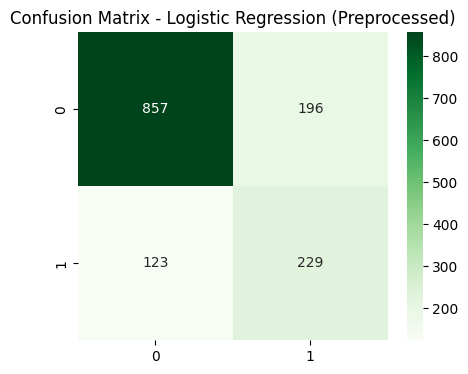


==================== Random Forest (Preprocessed) ====================
Accuracy: 0.7765

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1053
           1       0.55      0.59      0.57       352

    accuracy                           0.78      1405
   macro avg       0.71      0.71      0.71      1405
weighted avg       0.78      0.78      0.78      1405



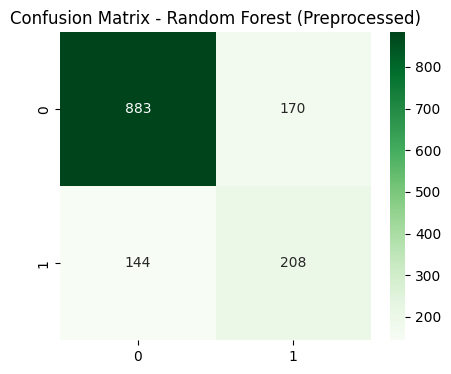


==================== Voting Classifier (Preprocessed) ====================
Accuracy: 0.7687

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1053
           1       0.53      0.66      0.59       352

    accuracy                           0.77      1405
   macro avg       0.70      0.73      0.71      1405
weighted avg       0.79      0.77      0.78      1405



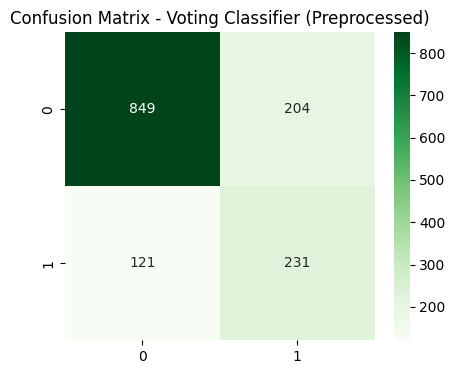

In [27]:
for name, model in models_clean.items():
    print(f"\n{'='*20} {name} {'='*20}")

    model.fit(X_train_final, y_train_final)

    y_pred_c = model.predict(X_test_final)

    # Evaluasi
    print(f"Accuracy: {accuracy_score(y_test, y_pred_c):.4f}") # y_test tetap asli (tidak di-SMOTE)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_c))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_c)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

# Grid untuk Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],            # Kekuatan regularisasi
    'solver': ['liblinear', 'lbfgs']    # Algoritma optimasi
}

# Grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],          # Jumlah pohon
    'max_depth': [None, 10, 20],        # Kedalaman pohon
    'min_samples_split': [2, 5]         # Minimal sampel untuk membelah node
}


## Logistic Regression

In [29]:
# Tuning Logistic Regression
print("Sedang melakukan tuning Logistic Regression...")
grid_lr = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=1000),
                       param_grid=param_grid_lr,
                       cv=3,
                       scoring='accuracy',
                       verbose=1,
                       n_jobs=-1)

grid_lr.fit(X_train_final, y_train_final)
best_lr = grid_lr.best_estimator_
print(f"LogReg Terbaik: {grid_lr.best_params_}")

Sedang melakukan tuning Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
LogReg Terbaik: {'C': 1, 'solver': 'lbfgs'}


## Random Forest

In [30]:
# Tuning Random Forest
print("\nSedang melakukan tuning Random Forest...")
grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid_rf,
                       cv=3,
                       scoring='accuracy',
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train_final, y_train_final)
best_rf = grid_rf.best_estimator_
print(f"Random Forest Terbaik: {grid_rf.best_params_}")



Sedang melakukan tuning Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Random Forest Terbaik: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}



==================== Tuned Logistic Regression ====================
Accuracy: 0.7730

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1053
           1       0.54      0.65      0.59       352

    accuracy                           0.77      1405
   macro avg       0.71      0.73      0.72      1405
weighted avg       0.79      0.77      0.78      1405



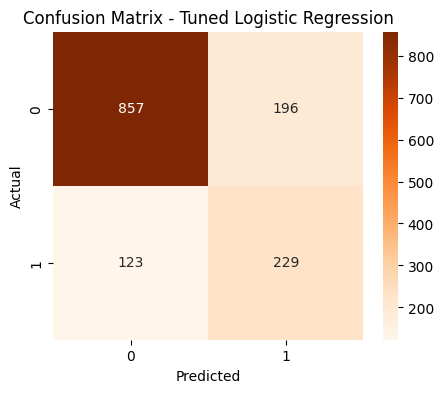


==================== Tuned Random Forest ====================
Accuracy: 0.7801

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1053
           1       0.56      0.60      0.58       352

    accuracy                           0.78      1405
   macro avg       0.71      0.72      0.71      1405
weighted avg       0.79      0.78      0.78      1405



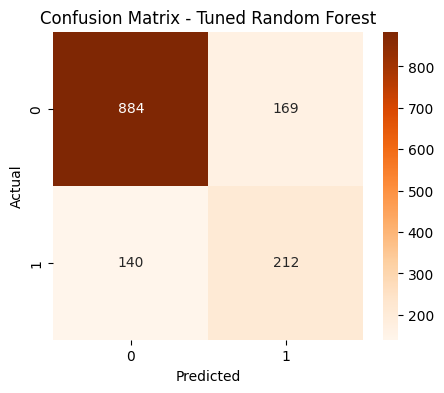

In [31]:
tuned_models = {
    "Tuned Logistic Regression": best_lr,
    "Tuned Random Forest": best_rf
}

for name, model in tuned_models.items():
    print(f"\n{'='*20} {name} {'='*20}")

    # Prediksi menggunakan model terbaik
    y_pred_tuned = model.predict(X_test_final)

    # Evaluasi
    print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_tuned))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_tuned)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# --- 1. Hitung Semua Metrik Evaluasi ---

# Prediksi ulang data test menggunakan model hasil tuning
y_pred_lr_tuned = best_lr.predict(X_test_final)
y_pred_rf_tuned = best_rf.predict(X_test_final)

# Hitung metrik untuk Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr_tuned)
prec_lr = precision_score(y_test, y_pred_lr_tuned)
rec_lr = recall_score(y_test, y_pred_lr_tuned)
f1_lr = f1_score(y_test, y_pred_lr_tuned)

# Hitung metrik untuk Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf_tuned)
prec_rf = precision_score(y_test, y_pred_rf_tuned)
rec_rf = recall_score(y_test, y_pred_rf_tuned)
f1_rf = f1_score(y_test, y_pred_rf_tuned)

# --- 2. Buat Tabel Perbandingan Lengkap ---

comparison_df = pd.DataFrame({
    'Model': ['Tuned Logistic Regression', 'Tuned Random Forest'],
    'Accuracy': [acc_lr, acc_rf],
    'Precision': [prec_lr, prec_rf],
    'Recall': [rec_lr, rec_rf],
    'F1-Score': [f1_lr, f1_rf]
})

print("=== PERBANDINGAN PERFORMA MODEL FINAL ===")
display(comparison_df)

# --- 3. Tentukan Pemenang (Best Estimator) ---
# Menggunakan Accuracy sebagai penentu utama

print("\n" + "="*40)
if acc_rf > acc_lr:
    print(f"🏆 MODEL TERBAIK ADALAH: RANDOM FOREST")
    print(f"   Alasan: Memiliki Akurasi tertinggi ({acc_rf:.4f})")
    final_model = best_rf
    model_name = "Random Forest"
else:
    print(f"🏆 MODEL TERBAIK ADALAH: LOGISTIC REGRESSION")
    print(f"   Alasan: Memiliki Akurasi tertinggi ({acc_lr:.4f})")
    final_model = best_lr
    model_name = "Logistic Regression"
print("="*40)

print(f"\nModel {model_name} telah disimpan ke variabel 'final_model'.")

=== PERBANDINGAN PERFORMA MODEL FINAL ===


,Model,Accuracy,Precision,Recall,F1-Score
0,Tuned Logistic Regression,0.772954,0.538824,0.650568,0.589447
1,Tuned Random Forest,0.780071,0.556430,0.602273,0.578445



🏆 MODEL TERBAIK ADALAH: RANDOM FOREST
   Alasan: Memiliki Akurasi tertinggi (0.7801)

Model Random Forest telah disimpan ke variabel 'final_model'.


In [33]:
import os
import joblib

# Tentukan Folder Tujuan
save_path = '/content/drive/MyDrive/UAS BENGKOD'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Dapatkan nama kolom dari data fitur yang telah dibersihkan
model_columns = X_clean.columns.tolist()

# Bungkus Model + Scaler + Kolom jadi SATU Dictionary
model_packet = {
    'model': final_model,       # Model terbaik (Random Forest/LogReg)
    'scaler': scaler,           # Scaler untuk normalisasi angka
    'columns': model_columns    # Daftar nama kolom agar urutan pas
}

# Simpan Menjadi 1 File Saja
file_name = os.path.join(save_path, 'single_best_model.pkl')
joblib.dump(model_packet, file_name)

print(f"✅ Berhasil! Semua komponen telah disimpan dalam 1 FILE saja.")
print(f"Lokasi: {file_name}")

✅ Berhasil! Semua komponen telah disimpan dalam 1 FILE saja.
Lokasi: /content/drive/MyDrive/UAS BENGKOD/single_best_model.pkl
